In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
class Polynomial_Regression():
    def __init__(self):
        self.__coefficients = None
        self.__degree = 0
    
    # Sum of x ^ power
    def power_sum(self,degree,x):
        sum_x = np.zeros(2 * degree + 1)
        for p in range(2 * degree + 1):
            sum_x[p] = np.sum(x**p)
        return sum_x
    
    # Creating Gauss-Jordan equation matrix
    def equation_matrix(self,degree,x):
        sum_x = self.power_sum(degree,x)
        matrix = np.zeros((degree + 1,degree + 1))
        
        for i in range(degree + 1):
            for j in range(degree + 1):
                matrix[i][j] = sum_x[j + i]
        return matrix
    
    # Creating Gauss-Jordan result matrix
    def result_matrix(self,degree,x,y):
        sum_y = np.zeros(degree + 1)
        for p in range(degree + 1):
            sum_y[p] = np.sum((x[n]**p) * y[n] for n in range(len(x)))
        return sum_y
    
    # Finding polynomial coefficients
    def fit(self,degree,x,y):
        equation_matrix = self.equation_matrix(degree,x)
        result_matrix = self.result_matrix(degree,x,y)
        
        self.__degree = degree
        self.__coefficients = np.linalg.solve(equation_matrix,result_matrix)
    
    # Predict x values
    def predict(self,x):
        result = 0
        for i in range(self.__degree + 1):
            result = result + ((x**i) * self.__coefficients[i])
        return result

In [11]:
#Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X=dataset.iloc[:,1:2].values
Y=dataset.iloc[:,2].values

# Reduce the dimentionality for validation
# Place the data to x axis
x = np.squeeze(X)
y = np.squeeze(Y)

pr = Polynomial_Regression()
pr.fit(4,x,y)

c:\users\abdullahdeliogullari\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.


#Visualising the Polynomial Regression results
X_grid = np.arange(min(x), max(x), 0.1)#for better graph
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x,pr.predict(x))
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

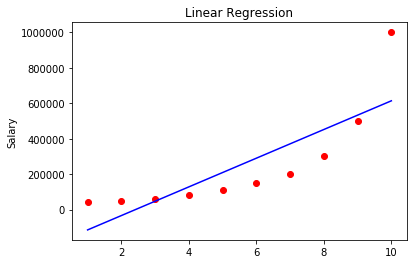

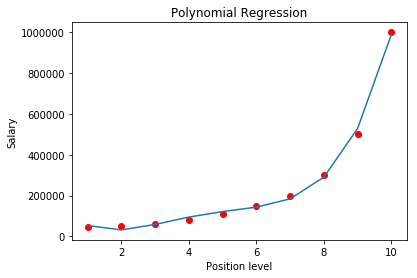

array([158862.45265155])

In [47]:
#Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X=dataset.iloc[:,1:2].values
Y=dataset.iloc[:,2].values

#Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

#Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly,Y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,Y)

#Visualising the Linear Regression results
plt.scatter(X,Y,color = 'red')
plt.plot(X,lin_reg.predict(X),color = 'blue')
plt.title('Linear Regression')
plt.ylabel('Salary')
plt.show()

#Visualising the Polynomial Regression results
X_grid = np.arange(min(X), max(X), 0.1)#for better graph
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = 'red')
plt.plot(X,lin_reg_2.predict(poly_reg.fit_transform(X)))
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

#Predicting a new result with Linear Regression
lin_reg.predict(np.reshape(6.5,(-1,1)))

#Predicting a new result with Polynomial Regression
lin_reg_2.predict(poly_reg.fit_transform(np.reshape(6.5,(-1,1))))